In [94]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib
import functions_spills

importlib.reload(functions_nHits)
importlib.reload(functions_spills)

%matplotlib inline

In [2]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)
tree = file["WCTEReadoutWindows"]  

times_branch = tree["hit_pmt_calibrated_times"].array()
charge_branch = tree["hit_pmt_charges"].array()

times_branch_sorted, times_branch_sorted_TOF, charge_branch_sorted, mpmt_id_branch_sorted, event_number_branch = functions_spills.initial_treatment(tree)


In [3]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)
tree_sig = file["WCTEReadoutWindows"]  

times_branch_sig = tree_sig["hit_pmt_calibrated_times"].array()
charge_branch_sig = tree_sig["hit_pmt_charges"].array()

times_branch_sorted_sig, times_branch_sorted_TOF_sig, charge_branch_sorted_sig, mpmt_id_branch_sorted_sig, event_number_branch_sig = functions_spills.initial_treatment(tree_sig)

In [4]:
times_branch_modified, threshold_times, deleted_index_dict = functions_spills.repeat_spills_nHits(event_number_branch, times_branch_sorted_TOF, 300, 5000, 4000)
times_branch_modified_sig, threshold_times_sig, deleted_index_dict_sig = functions_spills.repeat_spills_nHits(event_number_branch_sig, times_branch_sorted_TOF_sig, 300, 5000, 4000)


In [5]:
charge_branch_filtered = functions_spills.delete_indices_list(charge_branch_sorted, deleted_index_dict)
charge_branch_filtered_sig = functions_spills.delete_indices_list(charge_branch_sorted_sig, deleted_index_dict_sig)

In [6]:
times_branch_modified_chargesTT, charge_branch_modified_chargesTT, threshold_charges, deleted_indices = functions_spills.repeat_spills_Charge(event_number_branch, times_branch_modified, charge_branch_filtered, 50, 50, threshold = 5000)
times_branch_modified_chargesTT_sig, charge_branch_modified_chargesTT_sig, threshold_charges_sig, deleted_indices_sig = functions_spills.repeat_spills_Charge(event_number_branch_sig, times_branch_modified_sig, charge_branch_filtered_sig, 50, 50, threshold = 5000)

In [39]:
print(threshold_charges)

{7: [160646.69965204532], 13: [209090.52410623746], 21: [195197.33072523933], 72: [4197.088150849084], 87: [171999.80960563247, 193179.86314996652], 89: [125266.6683564509], 102: [46345.6649449645], 110: [212907.48033199584], 120: [83078.92420966277], 148: [226380.47834647182], 184: [207317.67511380592], 200: [22905.77600543527], 203: [156176.2518939893], 209: [100898.65174190603], 215: [14781.1083215375], 228: [175390.7463832087], 230: [81766.19008496653], 244: [86640.20762587896], 276: [239796.101506641], 278: [210856.08330332587], 279: [268516.14689590404], 294: [116467.1317894014], 320: [130271.47970171773], 321: [41797.13606341759], 326: [128529.37765802181], 341: [162740.01148889246], 342: [108738.13179459248], 360: [33253.97797611576], 382: [139411.37536186117], 389: [94820.26573759536, 151990.48782325027], 394: [94285.16818936425], 395: [3933.760159808248], 399: [55519.143129260585], 422: [113795.85017071856], 427: [195282.4561703125], 439: [12790.276098833705], 451: [231377.81

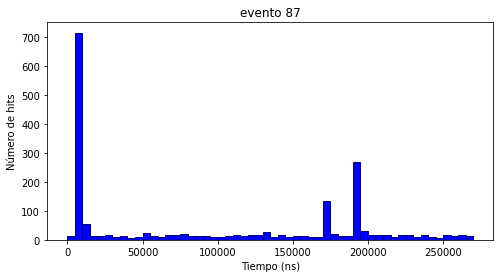

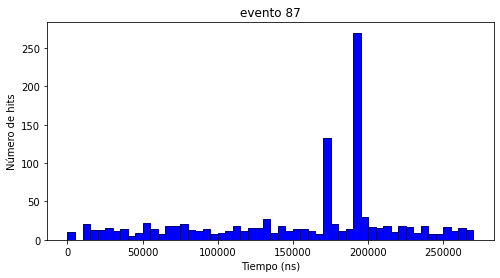

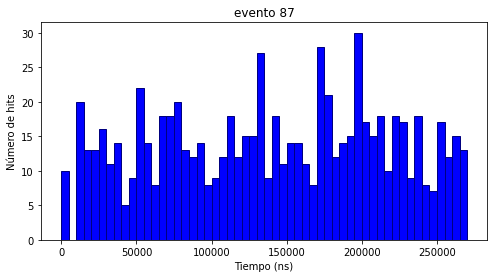

In [7]:
event_number = 87

plt.figure(figsize=(8, 4))
plt.hist(times_branch_sorted_TOF[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()


plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified_chargesTT[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

In [8]:
nDetections_event_in = []
nDetections_event_fin = []

nDetections_event_in_sig = []
nDetections_event_fin_sig = []

for x in times_branch_sorted_TOF:
    nDetections_event_in.append(len(x))

for x in times_branch_modified_chargesTT:
    nDetections_event_fin.append(len(x))

for x in times_branch_sorted_TOF_sig:
    nDetections_event_in_sig.append(len(x))

for x in times_branch_modified_chargesTT_sig:
    nDetections_event_fin_sig.append(len(x))

In [9]:
n_bins = 50

N_events = tree.num_entries
N_events_sig = tree_sig.num_entries

hist_in, bin_edges = np.histogram(nDetections_event_in, bins=n_bins)
hist_in_sig, _ = np.histogram(nDetections_event_in_sig, bins=bin_edges)  # usa los mismos bordes

hist_filtered, _ = np.histogram(nDetections_event_fin, bins = bin_edges)
hist_filtered_sig, _ = np.histogram(nDetections_event_fin_sig, bins = bin_edges)

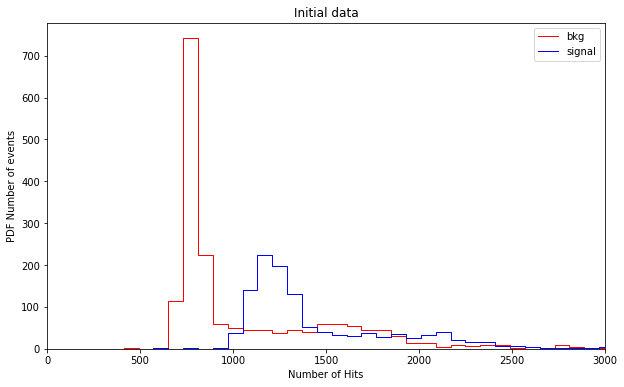

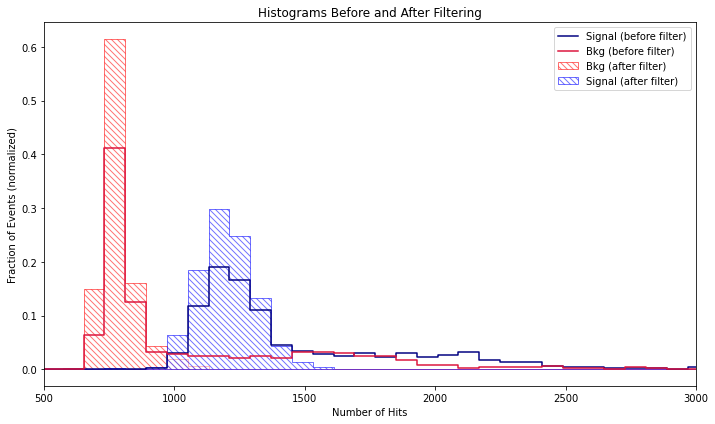

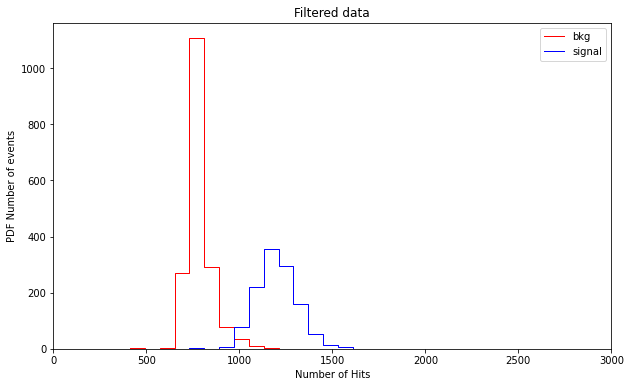

In [10]:
plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges[:-1], hist_in, where='post', linewidth=1, label='bkg', color='red')
plt.step(bin_edges[:-1], hist_in_sig, where='post', linewidth=1, label='signal', color='blue')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('PDF Number of events')
plt.title('Initial data')
plt.xlim(0, 3000)
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.fill_between(bin_edges[:-1], hist_filtered / N_events, hatch='\\\\\\\\', step='post', color='white', edgecolor='red', alpha=0.55, label='Bkg (after filter)')
plt.fill_between(bin_edges[:-1], hist_filtered_sig / N_events_sig, hatch='\\\\\\\\', step='post', color='white', edgecolor='blue', alpha=0.55, label='Signal (after filter)')
plt.step(bin_edges[:-1], hist_in_sig / N_events_sig, where='post', color='navy', linestyle='-', linewidth=1.5, label='Signal (before filter)')
plt.step(bin_edges[:-1], hist_in / N_events, where='post', color='crimson', linestyle='-', linewidth=1.5, label='Bkg (before filter)')
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Fraction of Events (normalized)')
plt.title('Histograms Before and After Filtering')
plt.tight_layout()
plt.xlim(500, 3000)
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges[:-1], hist_filtered, linewidth = 1, where='post', label='bkg', color='red')
plt.step(bin_edges[:-1], hist_filtered_sig, linewidth = 1, where='post', label='signal', color='blue')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('PDF Number of events')
plt.title('Filtered data')
plt.xlim(0, 3000)
plt.show()

In [11]:
bin_window = 4000

nHits_tot = functions_spills.counting_nHits_window(event_number_branch, times_branch_modified_chargesTT, bin_window)
nHits_in = functions_spills.counting_nHits_window(event_number_branch, times_branch_sorted_TOF, bin_window)

nHits_tot_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_modified_chargesTT_sig, bin_window)
nHits_in_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_sorted_TOF_sig, bin_window)

In [76]:
hist_in, bin_edges = np.histogram(nHits_in, bins=50, range=(0, 300))
hist_in_sig, _ = np.histogram(nHits_in_sig, bins=bin_edges, range=(0, 300))  # usa los mismos bordes

hist_filtered, bin_edges_filtered = np.histogram(nHits_tot, bins = 50, range=(0, 300))
hist_filtered_sig, _ = np.histogram(nHits_tot_sig, bins = bin_edges_filtered, range=(0, 300))

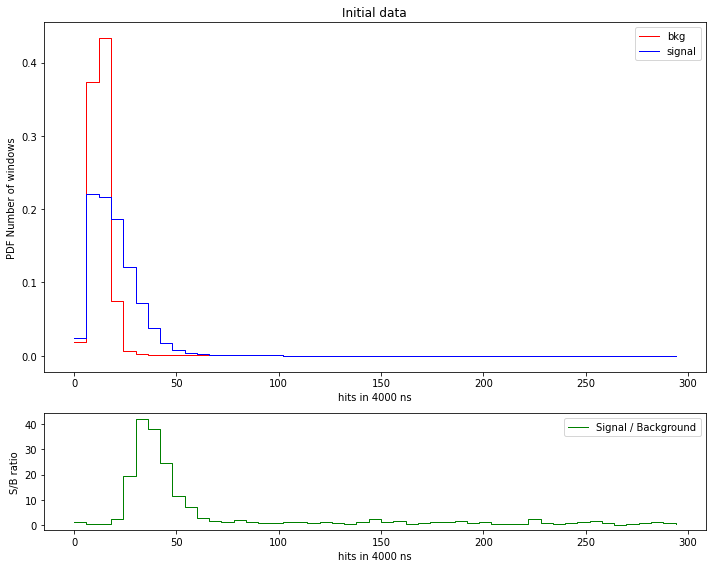

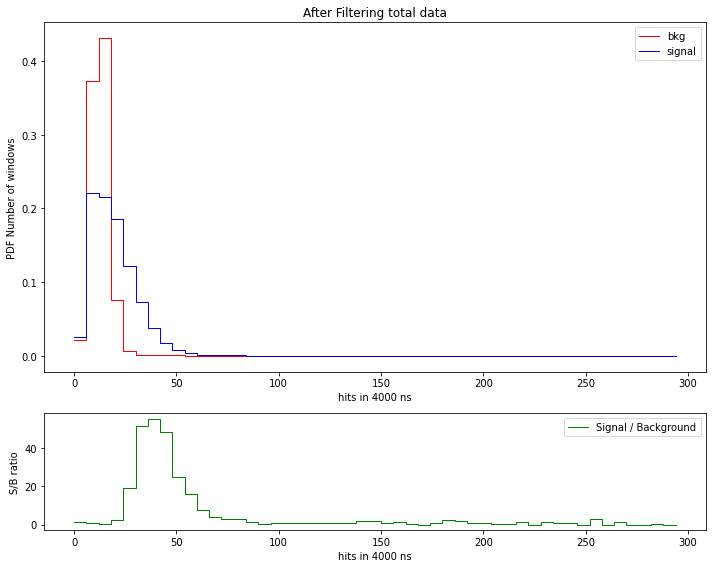

In [85]:
n_windows_ev = 270000 / bin_window

fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bin_edges[:-1], hist_in / (N_events * n_windows_ev), linewidth = 1, where='post', label='bkg', color='red')
axs[0].step(bin_edges[:-1], hist_in_sig / (N_events_sig * n_windows_ev), linewidth = 1, where='post', label='signal', color='blue')
axs[0].set_ylabel("PDF Number of windows")
axs[0].set_xlabel(f"hits in {bin_window} ns")
axs[0].set_title("Initial data")
#axs[0].set_yscale('log')
axs[0].legend()

# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_in_sig / (N_events_sig * n_windows_ev),
    hist_in / (N_events * n_windows_ev),
    out=np.full_like(hist_in, 0, dtype=float),
    where=hist_in > 0)
axs[1].step(bin_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel(f"hits in {bin_window} ns")
axs[1].set_ylabel("S/B ratio")
axs[1].legend()
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bin_edges_filtered[:-1], hist_filtered / (N_events * n_windows_ev), linewidth = 1, where='post', label='bkg', color='red')
axs[0].step(bin_edges_filtered[:-1], hist_filtered_sig / (N_events_sig * n_windows_ev), linewidth = 1, where='post', label='signal', color='blue')
axs[0].set_ylabel("PDF Number of windows")
axs[0].set_xlabel(f"hits in {bin_window} ns")
axs[0].set_title("After Filtering total data")
#axs[0].set_yscale('log')
axs[0].legend()

# Bottom plot: Signal/Background Ratio
ratio_2 = np.divide(
    hist_filtered_sig / (N_events_sig * n_windows_ev),
    hist_filtered / (N_events * n_windows_ev),
    out=np.full_like(hist_filtered, 0, dtype=float),
    where=hist_filtered > 0)
axs[1].step(bin_edges_filtered[:-1], ratio_2, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel(f"hits in {bin_window} ns")
axs[1].set_ylabel("S/B ratio")
axs[1].legend()
plt.tight_layout()
plt.show()


In [72]:
times_branch_modified_50, threshold_times_50, _ = functions_spills.repeat_spills_nHits(event_number_branch, times_branch_modified_chargesTT, 5, 50, 50)
times_branch_modified_50_sig, threshold_times_50_sig, _ = functions_spills.repeat_spills_nHits(event_number_branch_sig, times_branch_modified_chargesTT_sig, 5, 50, 50)

In [73]:
print(threshold_times_50)

{1: [58262.76172202379, 74148.15670182477], 2: [40704.26226256926, 91853.53722334503, 239032.11013135302], 3: [88731.78535346915], 4: [99430.36898674938], 7: [194425.00911460954], 9: [242305.96667982772], 13: [9802.056137569256, 46239.79457130578, 147962.01915209016], 14: [66510.37811512145, 72238.88700649944], 15: [25068.68535547433, 52805.20961384261], 16: [131226.3938954831, 131394.1312470759], 17: [54803.771967951296], 19: [188160.38782410193, 253848.5387747693], 20: [203451.72726714003], 21: [19872.87379485226, 70039.75528919454, 193193.9618301498], 23: [54681.32159514619, 59643.4601574205, 91194.15013080109, 180551.7822244057], 24: [42240.265042021], 25: [219380.3946211935, 233972.678885256], 30: [128254.31557721052], 33: [102672.90888805434], 34: [236734.52538815534, 253597.08348663658], 35: [136815.3451174498], 37: [36187.23226395816], 38: [499.6813680751965, 23096.568063205905, 152258.80627520088], 39: [232475.58782477307], 40: [62818.37812431456], 42: [106276.45508905328, 216

In [95]:
threshold_times_50 = functions_spills.prompt_candidates(event_number_branch, times_branch_modified_chargesTT, 100, 200, 10, 50)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [71]:
print(threshold_times_50)

{1: [74148.15670182477], 2: [91853.53722334503, 239032.11013135302], 3: [88731.78535346915], 4: [99375.3975922501], 9: [242305.96667982772], 13: [147962.74976695864], 14: [66510.37811512145, 72238.88700649944], 15: [52805.20961384261], 17: [54803.771967951296], 19: [188167.25964723207], 21: [193193.9618301498], 23: [54681.32159514619, 59643.4601574205, 91194.15013080109], 24: [42240.265042021], 33: [102672.90888805434], 34: [236734.52538815534], 35: [136832.9385322644], 38: [499.6813680751965], 39: [232475.58782477307], 42: [268895.417264595], 43: [77323.22182111173, 108318.21553660055], 46: [92126.45450317912], 47: [150064.0724332562], 49: [165784.10964220707], 52: [68814.39676057157, 92020.60827400422, 181229.81134722693], 56: [182718.70876062402], 62: [86430.40052966829], 63: [109321.037468351], 68: [229819.744796641], 70: [100514.81839043528], 77: [21207.724112641903], 82: [90460.93540313058], 91: [138275.00684036952], 98: [235718.54124237446], 105: [88196.09461970323, 159935.33843

In [59]:
print(threshold_times_50)

[173419.59429004797]


In [25]:
print(threshold_times_50_sig)

total = sum(len(lista) for lista in threshold_times_50_sig.values())
print("Total de elementos en todas las listas:", total)


{0: [12439.435165234376, 22032.638464726562, 22791.737520859377, 112793.44949160157, 173426.30692265625, 228070.15699492188], 1: [50748.13794070313, 140238.36466170312, 236731.45645703125], 2: [105360.042746875, 159973.8506144531, 182266.99313828125], 3: [30880.480345585936, 100657.51238046875, 128017.263188125, 133464.04723183592, 178073.02808], 4: [25211.9919609375, 90058.59386242187, 129589.75755175781, 135113.08095351563, 141233.2229123047, 184871.5390396875, 210930.713740625], 5: [37214.96040039063, 97684.66054746094, 101062.74233722656, 138901.89424472657, 210063.29226414062], 6: [2030.8427916015626, 7970.029541015625, 114179.85274804688, 121220.87823007813, 124712.94155566406, 137169.31164710937, 144953.44595328125, 171905.6240184375], 7: [55389.39417402344, 60151.72588101563, 79521.3808279297, 200407.10975996093, 243096.26845351563, 251474.0821822656], 8: [8338.414433320313, 103972.34095640625, 126758.93058460938], 9: [961.2927431640625, 84528.7219109375, 89874.08468339844, 132

In [47]:
print(threshold_times)

{0: [217187.86837401337], 1: [74906.64997881926], 6: [195405.36886235783], 9: [135873.82629840402], 11: [194161.9250689022], 12: [254076.9399941462], 13: [121743.5761050811], 14: [21849.091558789063, 149360.46252963427], 17: [96378.4483748177], 21: [119089.8833408259], 25: [242634.42602878803], 41: [175780.16294741313], 47: [240424.3039880211], 48: [63620.80161689407], 49: [35173.370978671875], 53: [139731.6673231945], 55: [60015.14563684196, 128881.48679219309], 57: [150924.58112926528], 60: [265324.0009781095], 62: [61674.180022420864, 228817.88353729033, 261583.00247661967], 63: [10127.637284919976], 65: [190205.36414762572], 67: [64710.227239665146], 68: [19917.93389316704], 74: [864.3793008505068], 78: [13546.182097616174], 81: [216074.95048011065], 82: [1095.2875732861976], 86: [161213.71366223213, 254133.52715234933], 87: [2402.2733305808006], 89: [154420.20246992187], 91: [75827.27114937502], 97: [33822.81114347673], 98: [5991.097643003782], 101: [237429.8890024706], 102: [2520

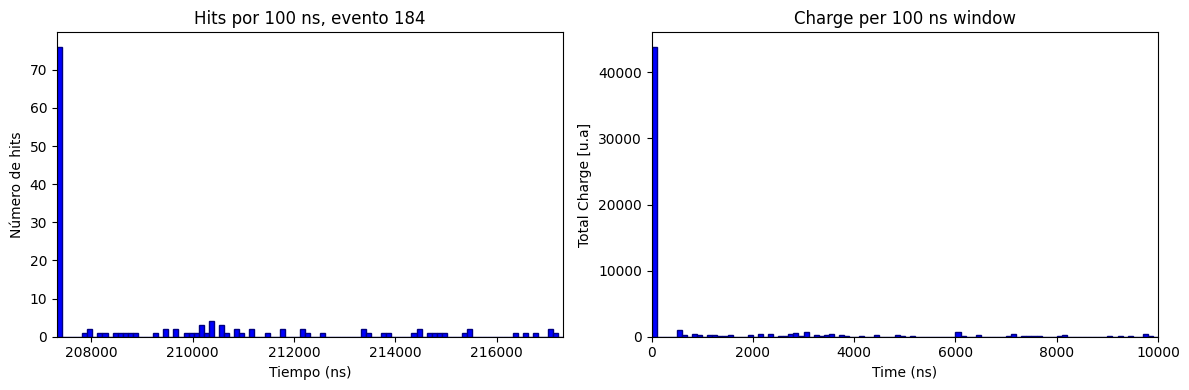

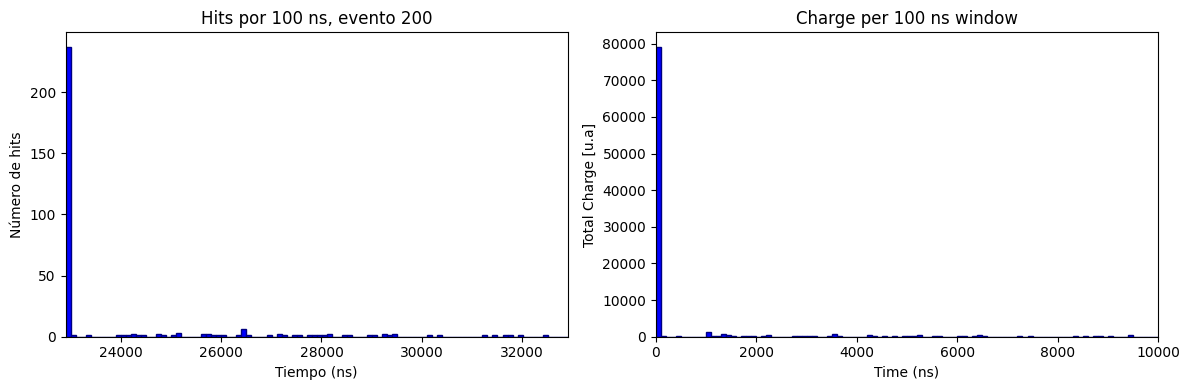

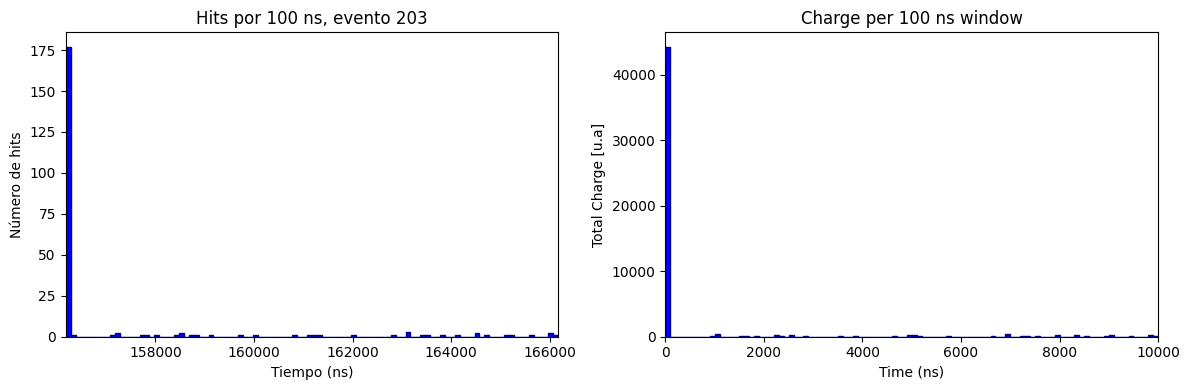

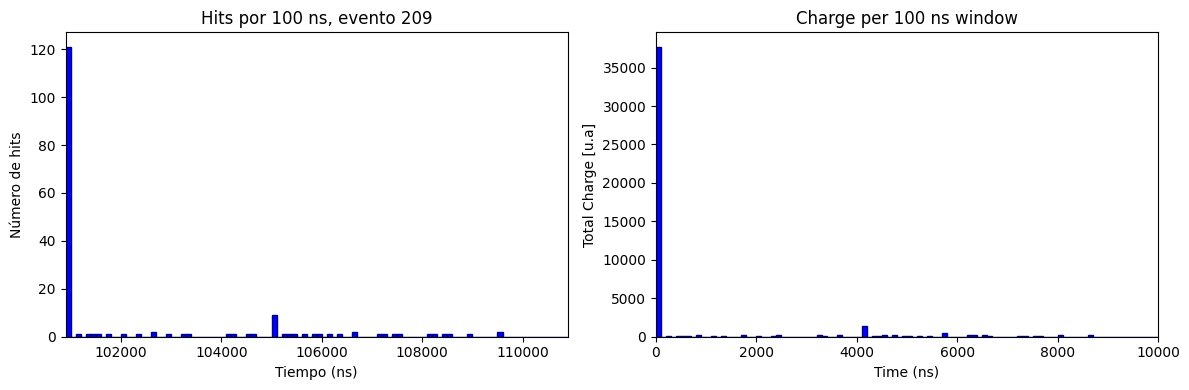

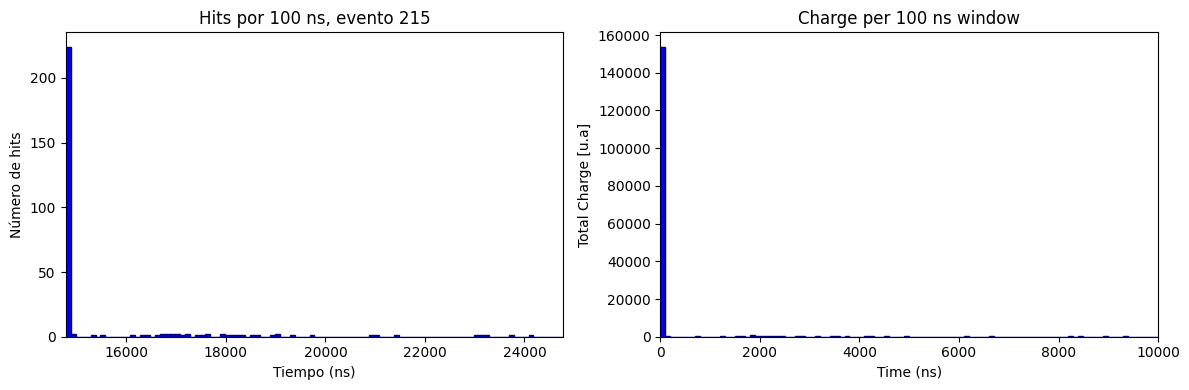

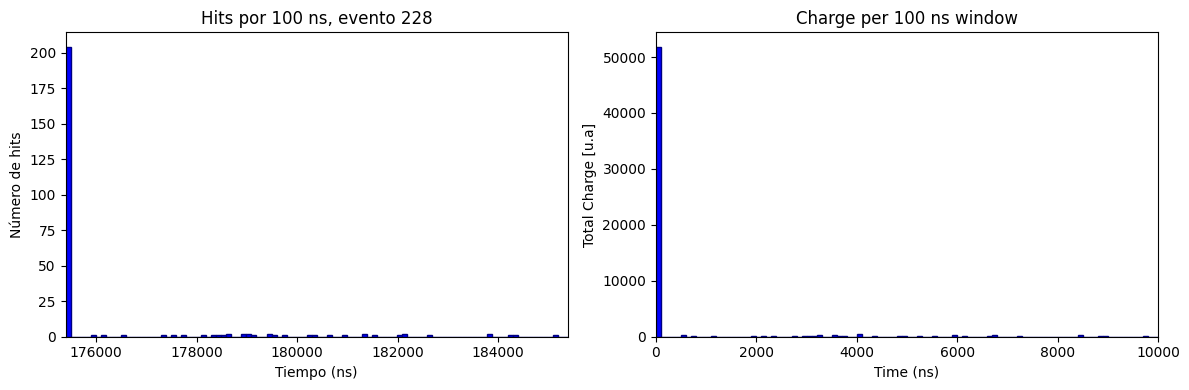

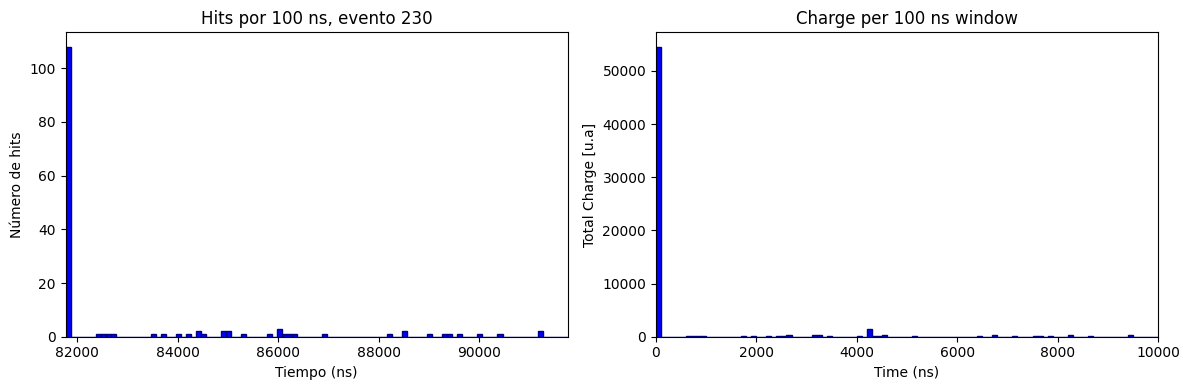

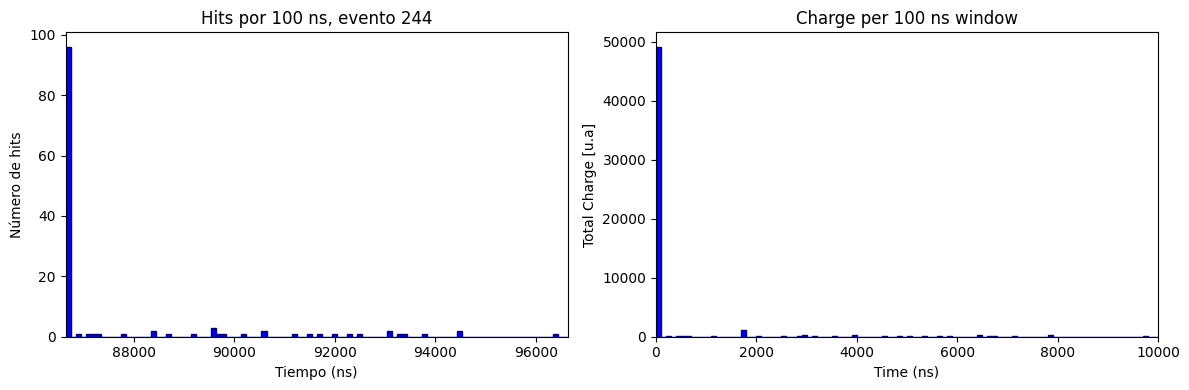

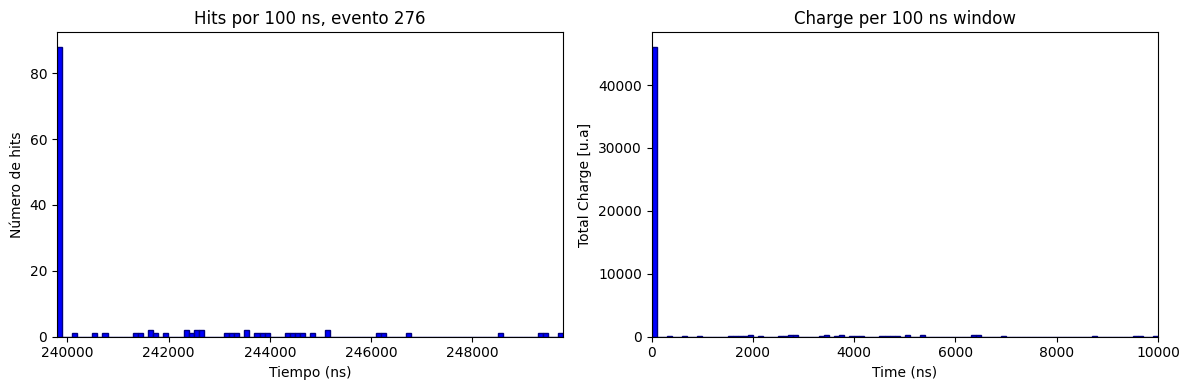

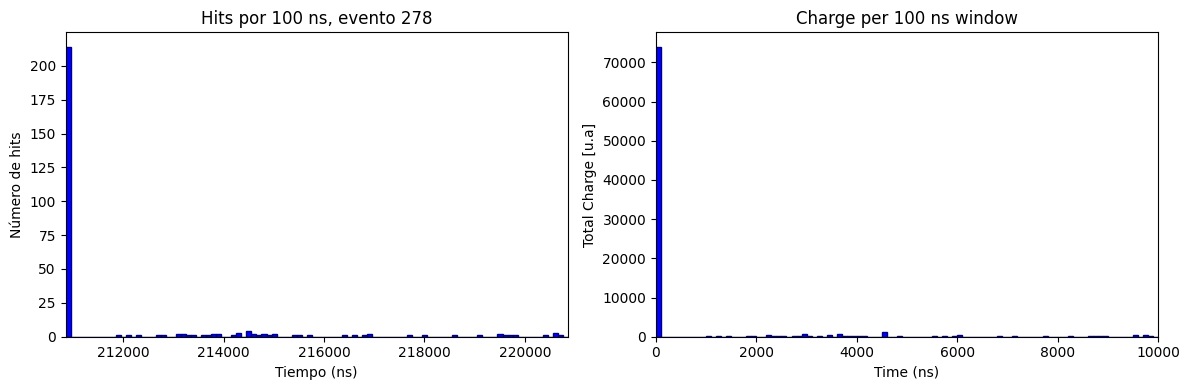

'\n        plt.figure(figsize=(8, 4))\n        plt.hist(charge, bins=100, color=\'blue\', edgecolor=\'navy\')\n        plt.xlabel(\'Charge (u.a)\')\n        plt.ylabel(\'Número de hits\')\n        plt.title("Histograma Charge in 50ns window")\n        plt.show()'

In [53]:
trigger_times_half = dict(list(threshold_charges.items())[10:20])
bin_time = 100
delta = 10000

for event_number in trigger_times_half:
    for start_time in trigger_times_half[event_number]:
        times_branch_event = times_branch[event_number]
        charges_branch_event = charge_branch[event_number]

        mask = (times_branch_event >= start_time) & (times_branch_event < start_time + delta)

        time = times_branch_event[mask]
        charge = charges_branch_event[mask]

        plt.style.use('default')
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        # --- Subplot 2: Histograma de número de hits en ventanas de 10 ns ---
        axs[0].hist(time, range=(start_time, start_time + delta), bins=int(delta/bin_time), color='blue', edgecolor='navy')
        axs[0].set_xlabel('Tiempo (ns)')
        axs[0].set_ylabel('Número de hits')
        axs[0].set_title(f"Hits por {bin_time} ns, evento {event_number}")
        axs[0].set_xlim(start_time, start_time+delta)

        sum_charges = functions_spills.plot_TotalCharge_Time(time, charge, bin_time, delta)

        axs[1].bar(np.arange(0, 0+delta, bin_time), sum_charges, width = bin_time, color='blue',  align='edge', edgecolor='navy')
        axs[1].set_xlabel("Time (ns)")
        axs[1].set_ylabel("Total Charge [u.a]")
        axs[1].set_title(f"Charge per {bin_time} ns window")
        axs[1].set_xlim(0, delta)
        plt.tight_layout()
        plt.show()
"""
        plt.figure(figsize=(8, 4))
        plt.hist(charge, bins=100, color='blue', edgecolor='navy')
        plt.xlabel('Charge (u.a)')
        plt.ylabel('Número de hits')
        plt.title("Histograma Charge in 50ns window")
        plt.show()"""

In [28]:
window_ns = 50

times_branch_sup5 = []
for event in event_number_branch:

    if event in threshold_times_50.keys():
    
        all_hits = [t for ref_time in threshold_times_50[event]
            for t in times_branch_modified_chargesTT[event]
            if ref_time <= t <= ref_time + window_ns]
        
    else:

        all_hits = []
    
    times_branch_sup5.append(np.array(all_hits))

times_branch_sup5_sig = []
for event in event_number_branch_sig:
    if event in  threshold_times_50_sig.keys():

        all_hits = [t for ref_time in threshold_times_50_sig[event]
            for t in times_branch_modified_chargesTT_sig[event]
            if ref_time <= t <= ref_time + window_ns]
    else:
        all_hits= []
    times_branch_sup5_sig.append(np.array(all_hits))


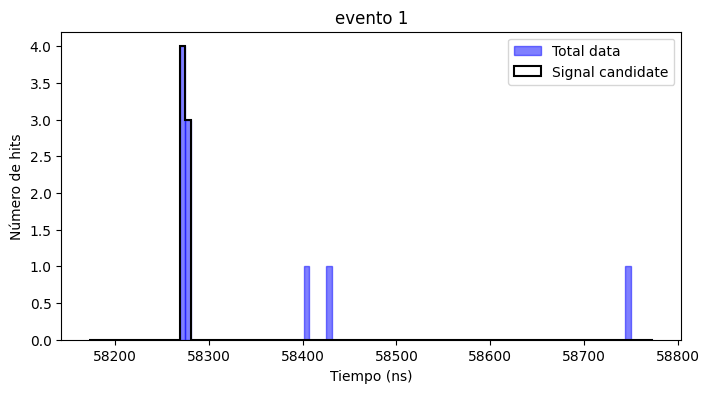

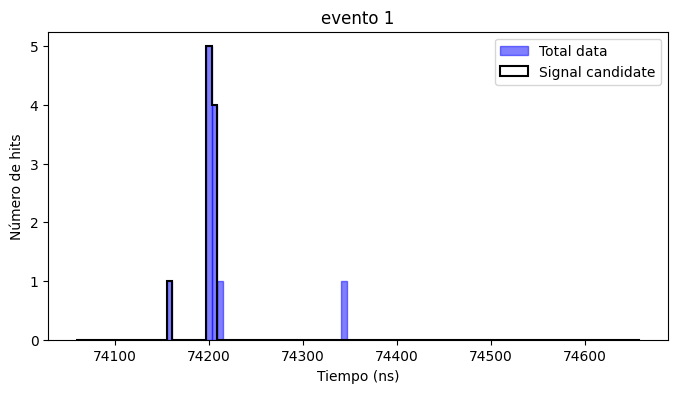

In [30]:
event_number = 1

for start_time in threshold_times_50[event_number]:
    plt.figure(figsize=(8, 4))
    plt.hist(times_branch_modified_chargesTT[event_number], range=[start_time-100, start_time + 500], bins=100, 
            color='blue', edgecolor='blue', alpha=0.5, label="Total data")
    plt.hist(times_branch_sup5[event_number], range=[start_time-100, start_time+500], bins=100, 
            histtype='step', color='black', linewidth=1.5, label="Signal candidate")
    plt.xlabel('Tiempo (ns)')
    plt.ylabel('Número de hits')
    plt.title(f'evento {event_number}')
    plt.legend()
    plt.show()


In [ ]:
nDetections_event_inf5 = []
nDetections_event_sup5 = []


for x in times_branch_modified_50:
    nDetections_event_inf5.append(len(x))

for x in times_branch_sup5:
    nDetections_event_sup5.append(len(x))

nDetections_event_inf5_sig = []
nDetections_event_sup5_sig = []


for x in times_branch_modified_50_sig:
    nDetections_event_inf5_sig.append(len(x))

for x in times_branch_sup5_sig:
    nDetections_event_sup5_sig.append(len(x))

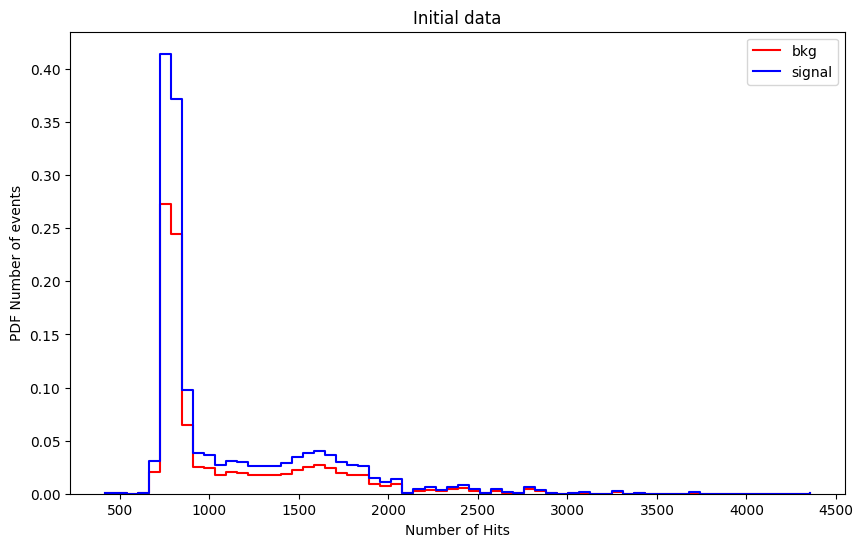

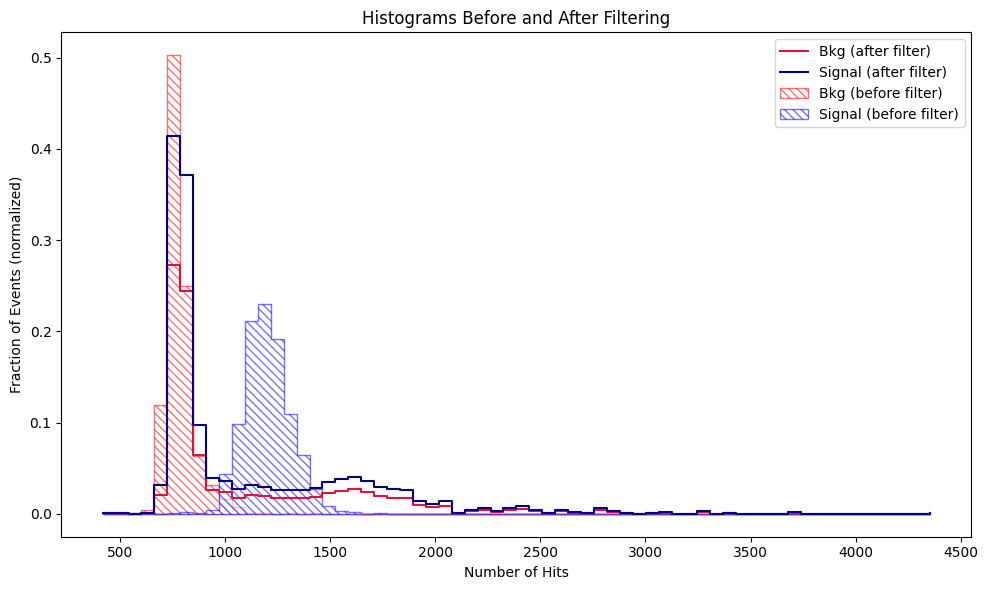

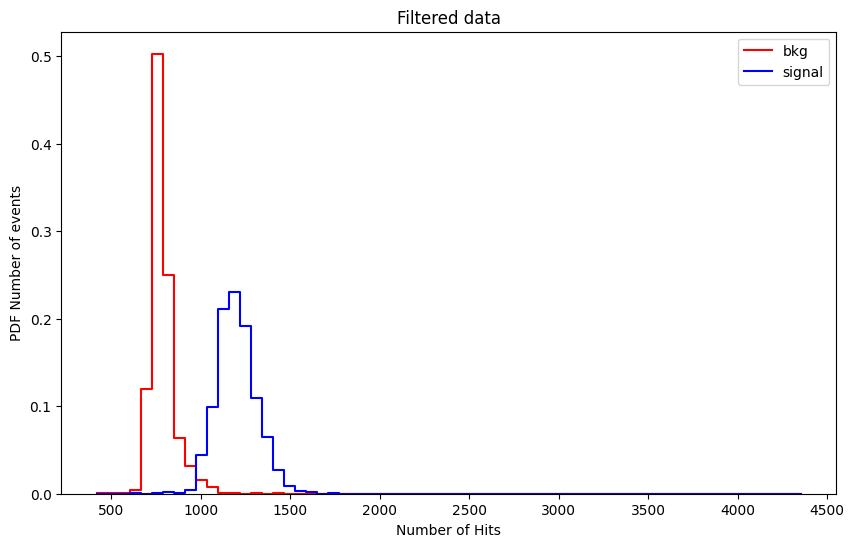

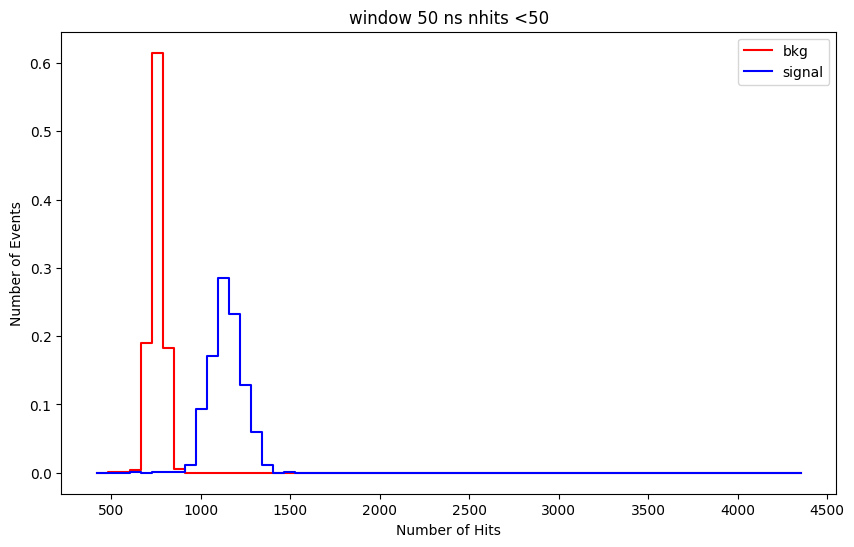

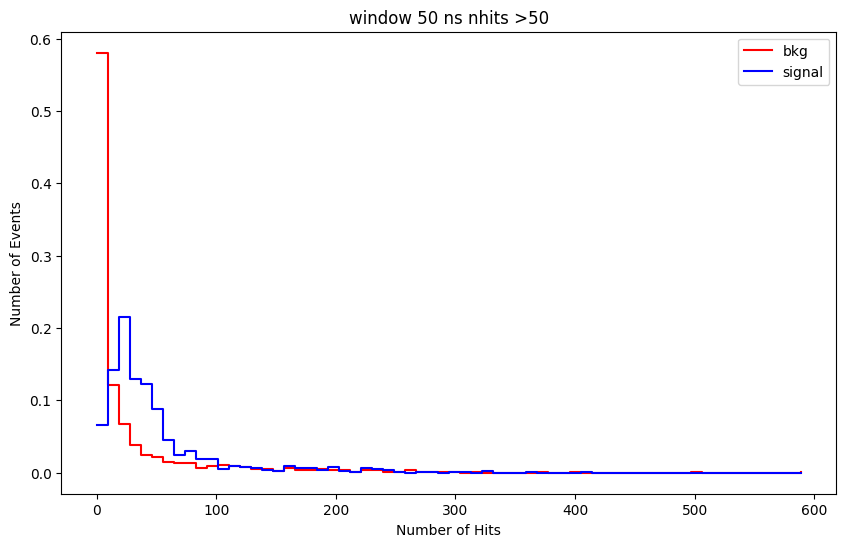

In [ ]:
max_hist = 6500
bin_hist =  100#max_hist / n_bins  
n_bins = int(max_hist / bin_hist)


hist_inf_5, _ = np.histogram(nDetections_event_inf5, bins = bin_edges)
hist_inf_5_sig, _ = np.histogram(nDetections_event_inf5_sig, bins = bin_edges)

hist_sup_5, bin_edges_2 = np.histogram(nDetections_event_sup5, bins = n_bins)
hist_sup_5_sig, _ = np.histogram(nDetections_event_sup5_sig, bins = bin_edges_2)


plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges[:-1], hist_inf_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_edges[:-1], hist_inf_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('window 50 ns nhits <50')
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges_2[:-1], hist_sup_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_edges_2[:-1], hist_sup_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('window 50 ns nhits >50')
#plt.yscale("log")
plt.show()


In [ ]:
bin_window = 4000

nHits_inf5 = functions_spills.counting_nHits_window(event_number_branch, times_branch_modified_50, bin_window)
nHits_sup5 = functions_spills.counting_nHits_window(event_number_branch, times_branch_sup5, bin_window)

nHits_inf5_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_modified_50_sig, bin_window)
nHits_sup5_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_sup5_sig, bin_window)


AttributeError: no field named 'sum'

(https://github.com/scikit-hep/awkward-1.0/blob/1.9.0/src/awkward/highlevel.py#L1124)

In [ ]:
n_bins = 100

hist_inf_5, bin_inf5 = np.histogram(nHits_inf5, np.arange(0, 11, 1))
hist_inf_5_sig, _ = np.histogram(nHits_inf5_sig, bins = bin_inf5)

hist_sup_5, bin_edges_2 = np.histogram(nHits_sup5, np.arange(0, 50, 2))
hist_sup_5_sig, _ = np.histogram(nHits_sup5_sig, bins = bin_edges_2)


In [ ]:

plt.figure(figsize=(10, 6))
plt.step(bin_inf5[:-1], hist_inf_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_inf5[:-1], hist_inf_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.ylabel("Number of windows")
plt.xlabel(f"hits in {bin_window} ns")
plt.title("window 50 ns nhits <5")
#plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.step(bin_edges_2[:-1], hist_sup_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_edges_2[:-1], hist_sup_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.ylabel("Number of windows")
plt.xlabel(f"hits in {bin_window} ns")
plt.title("window 50 ns nhits >5")
#plt.yscale('log')
plt.legend()
plt.show()